## 2.1 Image Formation Model

## <font color="Red"> 2.2 Practice: Modify above python program to acquire the image formation result </font>
<img src="IP02_1.png" width="800px">

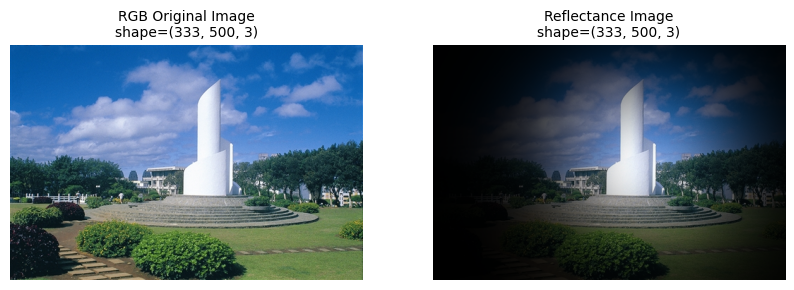

In [3]:
# Practice

import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def image_formation_model( f, x0, y0, sigma ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    reflectance = np.zeros( [ nr, nc ], dtype = 'float32' )
#-------------- Code Here ------------------#
    for x in range( nr ):
        for y in range( nc ):
            reflectance[x,y] = np.exp( -( (x-x0)**2 + (y-y0)**2 ) / (2*sigma*sigma) )
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                val = round( reflectance[x,y] * f[x,y,k])
                g[x,y,k] = np.uint8(val)
#-------------- Stop Here ------------------#
    return g


imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
x0 = nr/2
y0 = nc/2+50
sigma = 100
img2 = image_formation_model( img, x0, y0, sigma )

display_fig_names = [
    "RGB Original Image\nshape={}".format(img.shape),
    "Reflectance Image\nshape={}".format(img2.shape),
]
display_img = [img, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])


## <font color="Red"> 2.3 Practice: Modify above python program to acquire the image formation result with different x and y sigma values </font>
<img src="https://www.physicsforums.com/attachments/screen-shot-2017-03-09-at-9-42-13-pm-png.114284/">

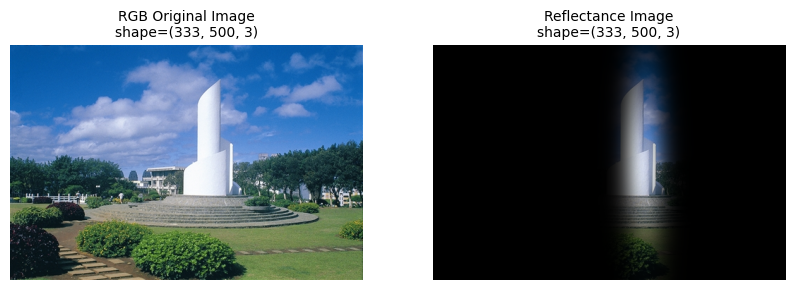

In [4]:
# Practice

import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def image_formation_model( f, x0, y0, sigmax, sigmay ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    reflectance = np.zeros( [ nr, nc ], dtype = 'float32' )
#-------------- Code Here ------------------#
    for x in range( nr ):
        for y in range( nc ):
            reflectance[x,y] = np.exp( -( (x-x0)**2/ (2*sigmax*sigmax) + (y-y0)**2/ (2*sigmay*sigmay) ) )
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                val = round( reflectance[x,y] * f[x,y,k])
                g[x,y,k] = np.uint8(val)
#-------------- Stop Here ------------------#
    return g


imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
x0 = nr/2
y0 = nc/2+50
sigmax = 100
sigmay = 20
img2 = image_formation_model( img, x0, y0, sigmax, sigmay )

display_fig_names = [
    "RGB Original Image\nshape={}".format(img.shape),
    "Reflectance Image\nshape={}".format(img2.shape),
]
display_img = [img, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])


## 2.4 Image Downsampling
#### <font color="orange"> Please check the program to find how the downsampling performed. </font>

## <font color="Red"> 2.5 Image downsampleing by the average of each nxn image block </font>
<font color="Red"> n : sampling_rate   <p>
(1) use for loop to calculate block average   <p>
(2) use np.mean to calculate block average

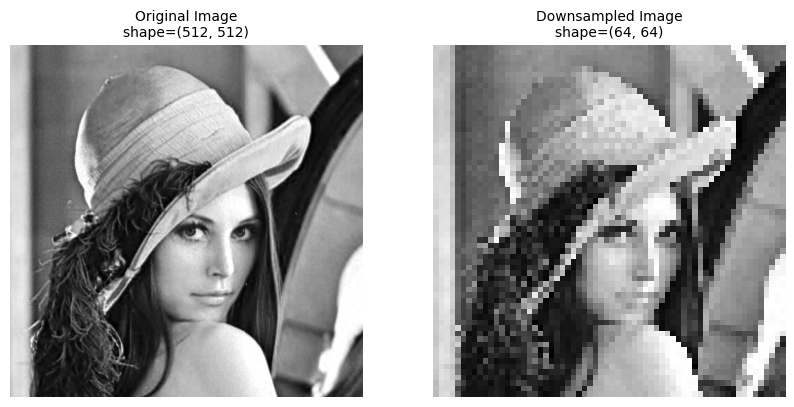

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def image_downsampling2( f, sampling_rate ):
    nr, nc = f.shape[:2]
    nr_s, nc_s = nr // sampling_rate, nc // sampling_rate
    g = np.zeros( [ nr_s, nc_s ], dtype = 'uint8' )
#-------------- Code Here ------------------#
    for x in range(nr_s):
        for y in range(nc_s):
            g[x,y] = f[x * sampling_rate, y * sampling_rate]


#-------------- Stop Here ------------------#
    return g

def main():
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_downsampling2( img1, 8 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Downsampled Image\nshape={}".format(img2.shape),
    ]
    display_img = [img1, img2]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main()

## <font color="Red"> 2.6 Image Upsampling
<font color="Red"> integer extension like slide p.27

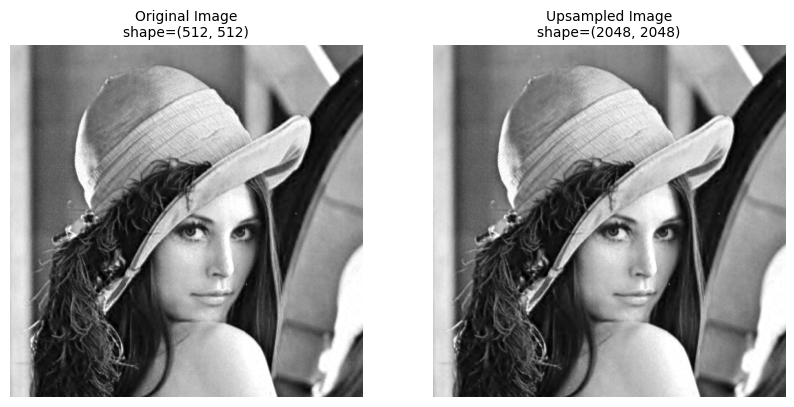

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def image_upsampling( f, sampling_rate ):
    nr, nc = f.shape[:2]
    nr_s, nc_s = nr * sampling_rate, nc * sampling_rate
    g = np.zeros( [ nr_s, nc_s ], dtype = 'uint8' )
#-------------- Code Here ------------------#
    for x in range(nr_s):
        for y in range(nc_s):
            g[x,y] = f[x // sampling_rate, y // sampling_rate]

#-------------- Stop Here ------------------#
    return g

def main():
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_upsampling( img1,4 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Upsampled Image\nshape={}".format(img2.shape),
    ]
    display_img = [img1, img2]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main()

## 2.7 Image Quantization
#### <font color="Orange"> Please check the program to find how the quantization performed. </font>

## <font color="Red"> 2.8 Image Quantization version 2 </font>
###  <font color="Red">Please modify above image quantization program by not using 0 and 255 in table </font>

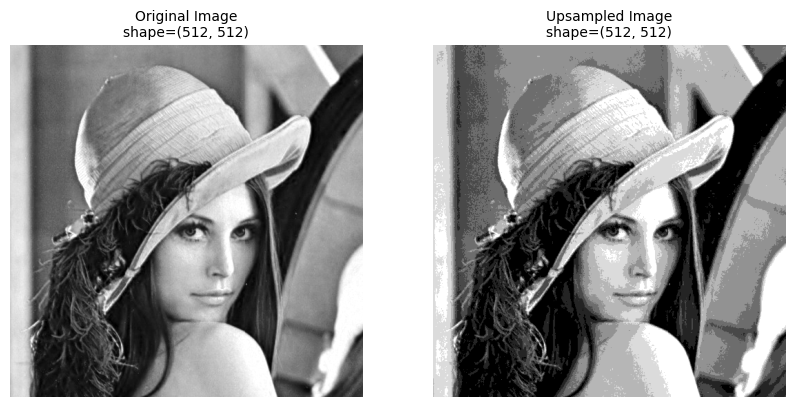

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def image_quantization( f, bits ):
    g = f.copy( )
    nr, nc = f.shape[:2]
#-------------- Code Here ------------------#
    levels = 2 ** bits
    interval = 256 / levels
    gray_level_interval = 255 / ( levels - 1 )
    table = np.zeros( 256 )
    for i in range(256):
        quantized_value = (i // interval) * interval + interval // 2
        if quantized_value == 0:
            quantized_value = interval // 2
        elif quantized_value == 255:
            quantized_value = 255 - interval // 2
        table[i] = quantized_value

    for i in range(nr):
        for j in range(nc):
            g[i, j] = table[f[i, j]]
#-------------- Stop Here ------------------#
    return g

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_quantization( img1, 3 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Upsampled Image\nshape={}".format(img2.shape),
    ]
    display_img = [img1, img2]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, 2, i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

##  <font color="Red"> 2.9 Image Addition & Subtraction(gray) </font>

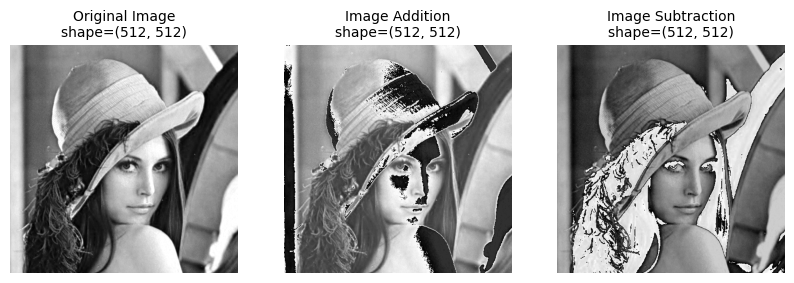

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def image_addition( f , c, sign):
    #sign=0: addition, sign=1: subtraction)
    nr, nc = f.shape[:2]
    g = np.zeros( [ nr, nc ], dtype = 'uint8' )
#-------------- Code Here ------------------#
    for x in range(nr):
        for y in range(nc):
            if sign == 0:
                g[x,y] = f[x,y] + c
            else:
                g[x,y] = f[x,y] - c

#-------------- Stop Here ------------------#
    return g

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_addition( img1 , 50, 0)
    img3 = image_addition( img1 , 50, 1)

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Image Addition\nshape={}".format(img2.shape),
    "Image Subtraction\nshape={}".format(img3.shape),
    ]
    display_img = [img1, img2, img3]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

##  <font color="Red"> 2.10 Practice Complements(gray) </font>

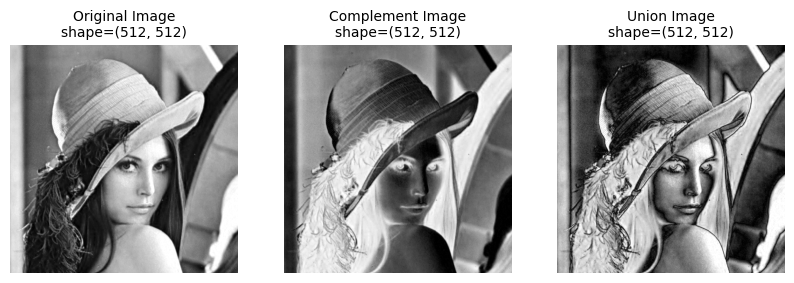

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def image_complement( f ):
    nr, nc = f.shape[:2]
    g = np.zeros( [ nr, nc ], dtype = 'uint8' )
#-------------- Code Here ------------------#
    for x in range(nr):
        for y in range(nc):
            g[x,y] = 255 - f[x,y]

#-------------- Stop Here ------------------#
    return g

def image_union( f, g ):
    nr, nc = f.shape[:2]
    u = np.zeros( [ nr, nc ], dtype = 'uint8' )
#-------------- Code Here ------------------#
    for x in range(nr):
        for y in range(nc):
            u[x,y] = max(f[x,y] , g[x,y])

#-------------- Stop Here ------------------#
    return u

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_complement( img1 )
    img3 = image_union( img1, img2 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Complement Image\nshape={}".format(img2.shape),
    "Union Image\nshape={}".format(img3.shape),
    ]
    display_img = [img1, img2, img3]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

## <font color="Red"> 2.11 Practice Complements(color) </font>

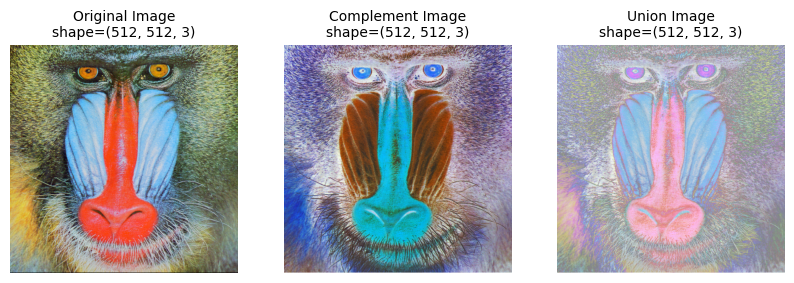

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def image_complement( f ):
    nr, nc = f.shape[:2]
    g = np.zeros( [ nr, nc , 3], dtype = 'uint8' )
#-------------- Code Here ------------------#
    for x in range(nc):
        for y in range(nr):
            for k in range(3):
                g[x,y,k] = 255 - f[x,y,k]

#-------------- Stop Here ------------------#
    return g

def image_union( f, g ):
    nr, nc = f.shape[:2]
    u = np.zeros( [ nr, nc ,3], dtype = 'uint8' )
#-------------- Code Here ------------------#
    for x in range(nc):
        for y in range(nr):
            for k in range(3):
                u[x,y,k] = max(f[x,y,k] , g[x,y,k])

#-------------- Stop Here ------------------#
    return u

def main( ):
    imgBGR = cv2.imread( "Baboon.bmp", cv2.IMREAD_COLOR )
    img1 = imgBGR[:,:,::-1]
    img2 = image_complement( img1 )
    img3 = image_union( img1, img2 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Complement Image\nshape={}".format(img2.shape),
    "Union Image\nshape={}".format(img3.shape),
    ]
    display_img = [img1, img2, img3]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

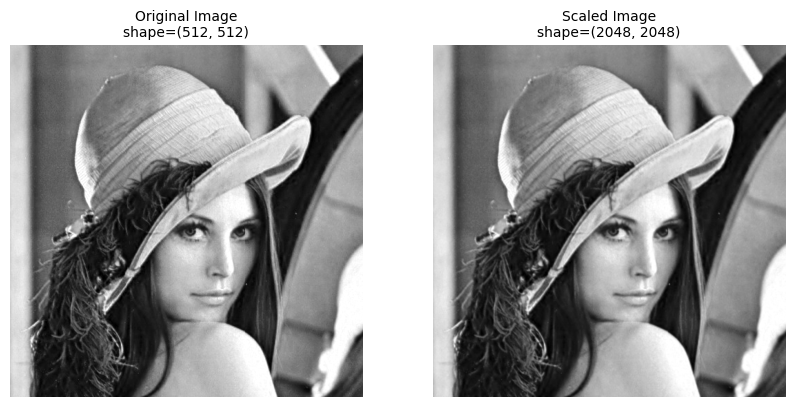

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

img1 = cv2.imread( "Lenna.bmp", -1 )
nr, nc = img1.shape[:2]
scale = 4
nr2 = int( nr * scale )
nc2 = int( nc * scale )
img2 = cv2.resize(img1, ( nr2, nc2 ), interpolation = cv2.INTER_LINEAR)

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Scaled Image\nshape={}".format(img2.shape),
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])

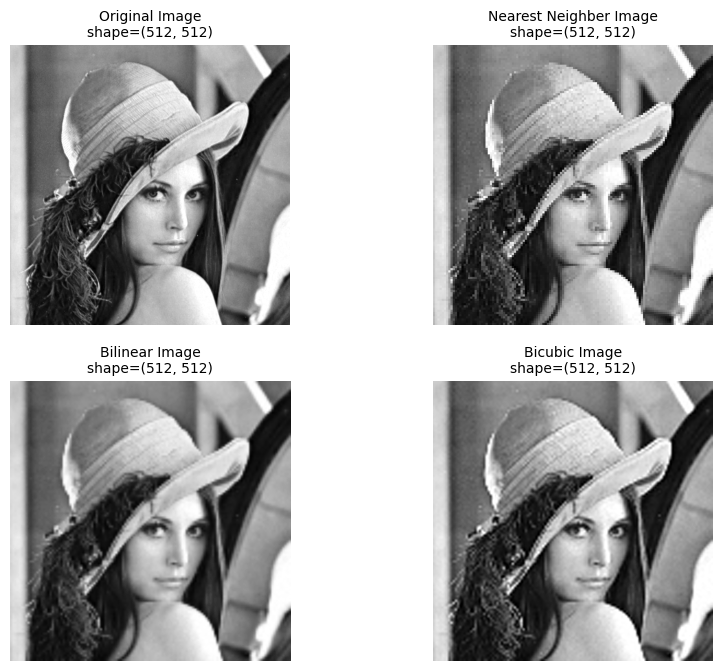

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread( "Lenna.bmp", -1 )
nr1, nc1 = img1.shape[:2]
nr2, nc2 = nr1 // 4, nc1 // 4
img2 = cv2.resize( img1, ( nr2, nc2 ), interpolation = cv2.INTER_NEAREST )
img2 = cv2.resize( img2, ( nr1, nc1 ), interpolation = cv2.INTER_NEAREST )
img3 = cv2.resize( img1, ( nr2, nc2 ), interpolation = cv2.INTER_LINEAR )
img3 = cv2.resize( img3, ( nr1, nc1 ), interpolation = cv2.INTER_LINEAR )
img4 = cv2.resize( img1, ( nr2, nc2 ), interpolation = cv2.INTER_CUBIC )
img4 = cv2.resize( img4, ( nr1, nc1 ), interpolation = cv2.INTER_CUBIC )


display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Nearest Neighber Image\nshape={}".format(img2.shape),
"Bilinear Image\nshape={}".format(img3.shape),
"Bicubic Image\nshape={}".format(img4.shape),
]
display_img = [img1, img2, img3, img4]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## <font color="Red"> 2.14 Homework PSNR</font> <p>
<font color="Red"> Design a PSNR function to measure the difference between
(img,img1), (img,img2), and (img,img3)<p>
<img src="https://4.bp.blogspot.com/-82C6B1wcYz0/UvIjcJ4S6TI/AAAAAAAABCY/OwGVIQwgUAc/s1600/fig1.PNG"></p>

In [14]:
import numpy as np
import math

def psnr_2(img1, img2):
#-------------- Code Here ------------------#
  m = np.mean((img1 - img2) ** 2)
  if m == 0:
      return 100
  PIXEL_MAX = 255.0
  return 10 * math.log10(PIXEL_MAX / math.sqrt(m))

#-------------- Code Here ------------------#

def psnr(img1, img2):
#-------------- Code Here ------------------#
  nc, nr = img1.shape[:2]
  SE = 0.0
  for i in range(nc):
      for j in range(nr):
          if img1[i,j] > img2[i,j]:
              dif = img1[i,j] - img2[i,j]
          else:
              dif = img2[i,j] - img1[i,j]
          SE = SE +  dif * dif
  MSE = SE / (nc * nr)
  return 10 * math.log10(255.0**2 / MSE)
#-------------- Stop Here ------------------#

psnr1 = psnr(img1,img2)
psnr11 = psnr_2(img1,img2)
psnr2 = psnr(img1,img3)
psnr3 = psnr(img1,img4)
print("PSNR between origin and Nearest Neighbor",psnr1)
print("PSNR between origin and Nearest Neighbor PSNR2",psnr11)
print("PSNR between origin and Bilinear",psnr2)
print("PSNR between origin and Bicubic",psnr3)

<ipython-input-14-3620dae5b822>:24: RuntimeWarning: overflow encountered in scalar multiply
  SE = SE +  dif * dif


PSNR between origin and Nearest Neighbor 31.16802840976142
PSNR between origin and Nearest Neighbor PSNR2 15.58401420488071
PSNR between origin and Bilinear 32.87186372832708
PSNR between origin and Bicubic 33.01212649632711


## 2.15 Image Rotation

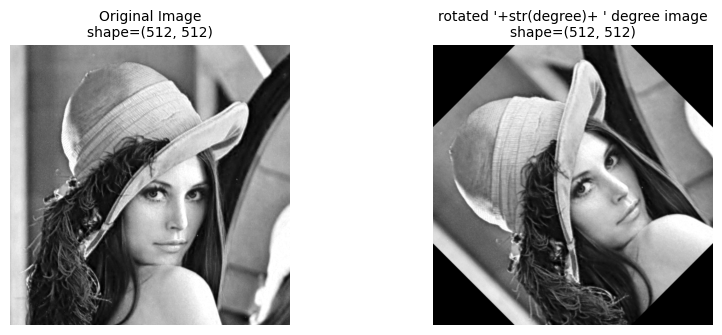

In [15]:
import numpy as np
import cv2

img1 = cv2.imread( "Lenna.bmp", -1 )
nr2, nc2 = img1.shape[:2]
degree = 45
rotation_matrix = cv2.getRotationMatrix2D( ( nr2 / 2, nc2 / 2 ), degree, 1 )
img2 = cv2.warpAffine( img1, rotation_matrix, ( nr2, nc2 ) )

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"rotated '+str(degree)+ ' degree image\nshape={}".format(img2.shape),
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## 2.16 Image Flip

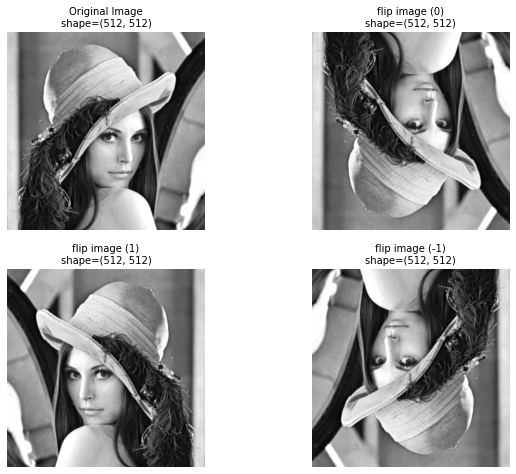

In [ ]:
import numpy as np
import cv2

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.flip( img1, 0 )
img3 = cv2.flip( img1, 1 )
img4 = cv2.flip( img1, -1 )

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"flip image (0)\nshape={}".format(img2.shape),
"flip image (1)\nshape={}".format(img2.shape),
"flip image (-1)\nshape={}".format(img2.shape),
]
display_img = [img1, img2, img3, img4]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

##  <font color="Red"> 2.17 Homework Flip </font>
<font color="Red"> Write Flip function yourself, don't use cv2.flip   
img2 = my_flip( img1,0) #same as cv2.flip(img1,0)   
img3 = my_flip( img1,1) #same as cv2.flip(img1,1)   
img4 = my_flip( img1,-1) #same as cv2.flip(img1,-1)   
</font>

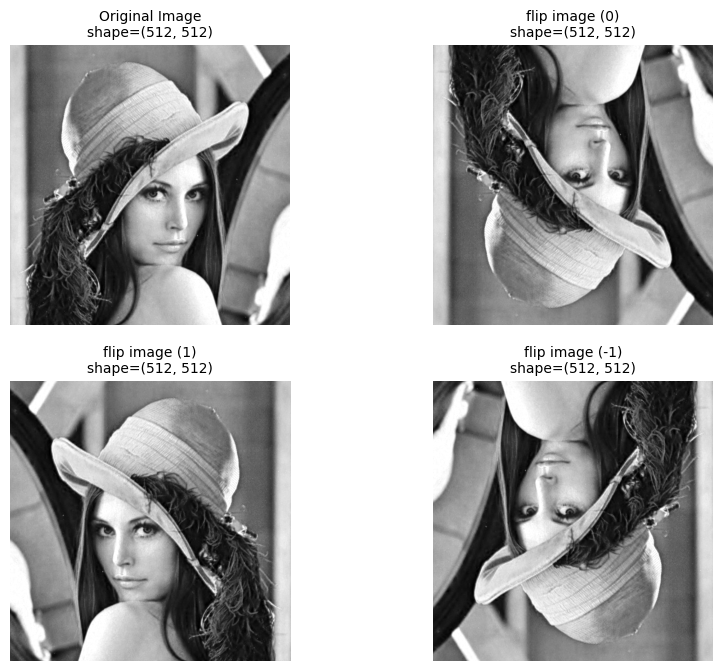

In [16]:
import numpy as np
import math

def my_flip(img1, type):
# type = 0, vertical flip
# type = 1, horizontal flip
# type = -1, vertical and horizontal flip
#-------------- Code Here ------------------#
    u = img1.copy()
    if type == 0:
        u = np.flipud(img1)
    elif type == 1:
        u = np.fliplr(img1)
    elif type == -1:
        u = np.flipud(np.fliplr(img1))
#-------------- Stop Here ------------------#
    return u

img1 = cv2.imread("Lenna.bmp", -1 )
img2 = my_flip(img1,0)
img3 = my_flip(img1,1)
img4 = my_flip(img1,-1)

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"flip image (0)\nshape={}".format(img2.shape),
"flip image (1)\nshape={}".format(img2.shape),
"flip image (-1)\nshape={}".format(img2.shape),
]
display_img = [img1, img2, img3, img4]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

##  <font color="Black"> 2.18 Affine Transformation </font>

[[0.59960938 0.3984375  0.        ]
 [0.         1.         0.        ]]
[[-1.000000e+00  0.000000e+00  5.120000e+02]
 [ 1.953125e-01  8.046875e-01  0.000000e+00]]
[[ -1.   0. 512.]
 [  0.   1.   0.]]
[[  0.6015625  -0.3984375 204.       ]
 [  0.          1.          0.       ]]
[[-1.000000e+00  0.000000e+00  5.120000e+02]
 [-1.953125e-01  8.046875e-01  1.000000e+02]]


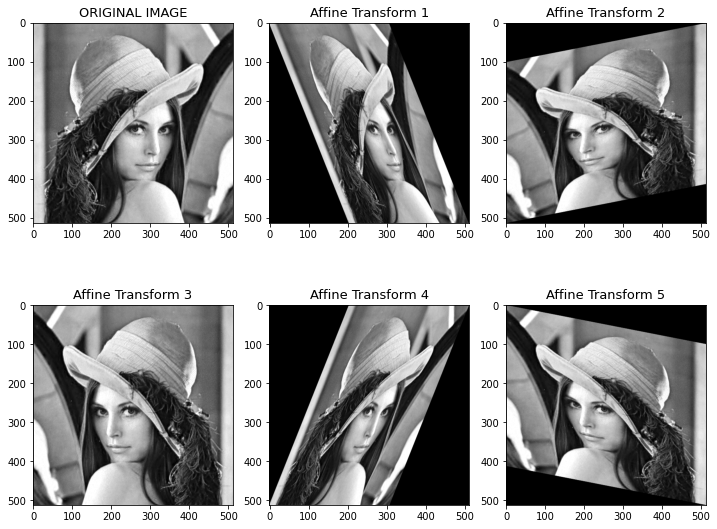

In [ ]:
import numpy as np
import math
import cv2

def affine_transform(image, src_points, dest_points):
    affine_matrix = cv2.getAffineTransform(src_points, dest_points)
    print(affine_matrix)
    return_img = cv2.warpAffine(image, affine_matrix, (image.shape[0], image.shape[1]))
    return return_img

affine_names = ["ORIGINAL IMAGE", "Affine Transform"] # will be set as title for each image
img1 = cv2.imread("Lenna.bmp", -1 )
rows, cols = img1.shape[:2] # will return rows = cols = 330
src_points = np.float32([[0, 0], [cols, 0], [0, rows]])

            # float32([[x1, y1], [x2, y2], [x3, y3]])
dst_points1 = np.float32([[0, 0], [int(.6*cols), 0], [int(.4*cols), rows]])
dst_points2 = np.float32([[cols, 0], [0, 100], [cols, rows-100]])
dst_points3 = np.float32([[cols, 0], [0, 0], [cols, rows]])
dst_points4 = np.float32([[int(.4*cols), 0], [cols, 0], [0, rows]])
dst_points5 = np.float32([[cols, 100], [0, 0], [cols, rows]])

affine_fig = plt.figure(figsize=(10, 8)) # figsize(width/horizontally, height/vertically)
affine_img = [
    img1, # the original image
    affine_transform(img1, src_points, dst_points1),
    affine_transform(img1, src_points, dst_points2),
    affine_transform(img1, src_points, dst_points3),
    affine_transform(img1, src_points, dst_points4),
    affine_transform(img1, src_points, dst_points5)
]

for i in range(len(affine_img)):
    a = affine_fig.add_subplot(2, 3, i+1) # position index always starts from 1, thus i+1
    plot_image(affine_img[i], title=affine_names[0] if i == 0 else affine_names[1] + " " + str(i), font_size=13, axis="on")
plt.tight_layout() # margin adjusted


##  <font color="Red"> 2.19 Homework Affine Transformation </font>
<font color="Red"> The followings are code from ChatGPT.   
    Please modify these codes for image affine transform to fit the following requirement    
    1. only use OpenCV on image read and image display    
    2. don't use PIL on image processing    

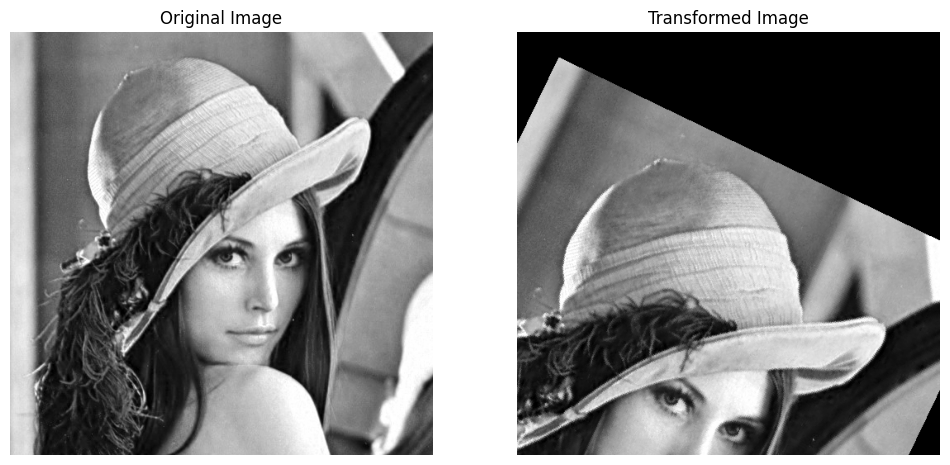

In [17]:
'''
import numpy as np
from PIL import Image
def affine_transform(image, matrix):
    # 获取图像的宽度和高度
    width, height = image.size
    # 创建输出图像
    transformed_image = Image.new("RGB", (width, height))
    pixels = transformed_image.load()
    # 反向映射
    inv_matrix = np.linalg.inv(matrix)
    for x in range(width):
        for y in range(height):
            # 计算原始图像中的位置
            original_pos = np.dot(inv_matrix, [x, y, 1])
            original_x, original_y = original_pos[0], original_pos[1]
            # 检查是否在原始图像的范围内
            if 0 <= original_x < width and 0 <= original_y < height:
                # 获取原始图像中的像素值
                original_pixel = image.getpixel((int(original_x), int(original_y)))
                # 设置变换后图像中的像素值
                pixels[x, y] = original_pixel
    return transformed_image
# 读取图像
image = Image.open('input.jpg')
# 定义仿射变换矩阵
# 例如：缩放、旋转、平移
scale_x, scale_y = 1.2, 1.2
rotate_angle = np.radians(30)
translate_x, translate_y = 50, 30
# 构建仿射变换矩阵
matrix = np.array([
    [scale_x * np.cos(rotate_angle), -np.sin(rotate_angle), translate_x],
    [np.sin(rotate_angle), scale_y * np.cos(rotate_angle), translate_y],
    [0, 0, 1]
])
# 应用仿射变换
transformed_image = affine_transform(image, matrix)
# 显示原始图像和变换后的图像
image.show()
transformed_image.show()
'''

#-------------- Code Here ------------------#
import numpy as np
import cv2

def affine_transform(image, matrix):
    height, width = image.shape[:2]
    inv_matrix = np.linalg.inv(matrix)
    transformed_image = np.zeros_like(image)
    for x in range(width):
        for y in range(height):
            ori_pos = np.dot(inv_matrix, [x, y, 1])
            ori_x, ori_y = ori_pos[0], ori_pos[1]
            if 0 <= ori_x < width and 0 <= ori_y < height:
                ori_pixel = image[int(ori_y), int(ori_x)]
                transformed_image[y, x] = ori_pixel
    return transformed_image


image = cv2.imread("Lenna.bmp", -1 )
scale_x, scale_y = 1.2, 1.2
rotate_angle = np.radians(30)
translate_x, translate_y = 50, 30

matrix = np.array([
    [scale_x * np.cos(rotate_angle), -np.sin(rotate_angle), translate_x],
    [np.sin(rotate_angle), scale_y * np.cos(rotate_angle), translate_y],
    [0, 0, 1]
])
transformed_image = affine_transform(image, matrix)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

#-------------- Stop Here ------------------#

## 2.20 Perspective Transform

1335 2000


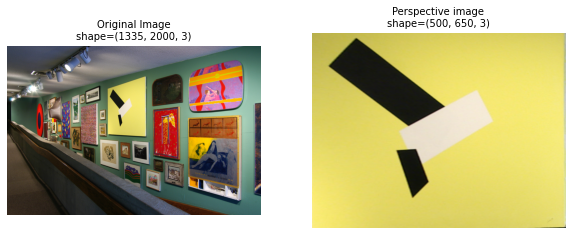

In [ ]:
import numpy as np
import cv2

imgBGR = cv2.imread("Gallery.bmp", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
nr, nc = img1.shape[:2]
print(nr,nc)
pts1 = np.float32( [ [ 795, 350 ], [ 795, 690 ], [ 1090, 720 ], [ 1090, 250 ] ] )
pts2 = np.float32( [ [ 0, 0 ], [ 0, 500 ], [ 650, 500 ], [ 650, 0 ] ] )
T = cv2.getPerspectiveTransform( pts1, pts2 )
img2 = cv2.warpPerspective( img1, T, ( 650, 500 ) )

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Perspective image\nshape={}".format(img2.shape),
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## <font color="Red">2.21 Practice: Perspective transform </font>
#### <font color="Red"> use perspective transform to find the following result
<img src="IP02_2.png" height="600px">


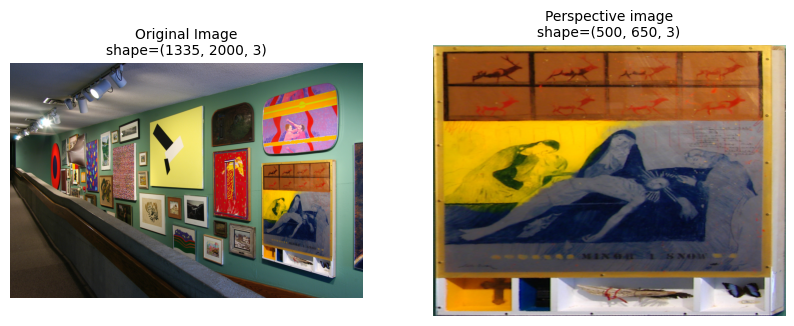

In [19]:
import numpy as np
import cv2

imgBGR = cv2.imread("Gallery.bmp", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
nr, nc = img1.shape[:2]
#-------------- Code Here ------------------#
pts1 = np.float32( [ [ 1425, 570 ], [ 1425, 1110 ], [ 1848, 1230 ], [ 1848, 550 ] ] )
pts2 = np.float32( [ [ 0, 0 ], [ 0, 500 ], [ 650, 500 ], [ 650, 0 ] ] )
T = cv2.getPerspectiveTransform( pts1, pts2 )
img2 = cv2.warpPerspective( img1, T, ( 650, 500 ) )
#-------------- Stop Here ------------------#
display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Perspective image\nshape={}".format(img2.shape),
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## <font color="Red">2.22 Practice:Rotation and Scaling </font>
#### <font color="Red"> Please use the combination of cv2.getRotationMatrix2D and cv2.warpAffine to rotate an image with given degree and fit in the image under size 512x512
<img src="IP02_3.png" height="600px">
<img src="IP02_4.png" height="600px">

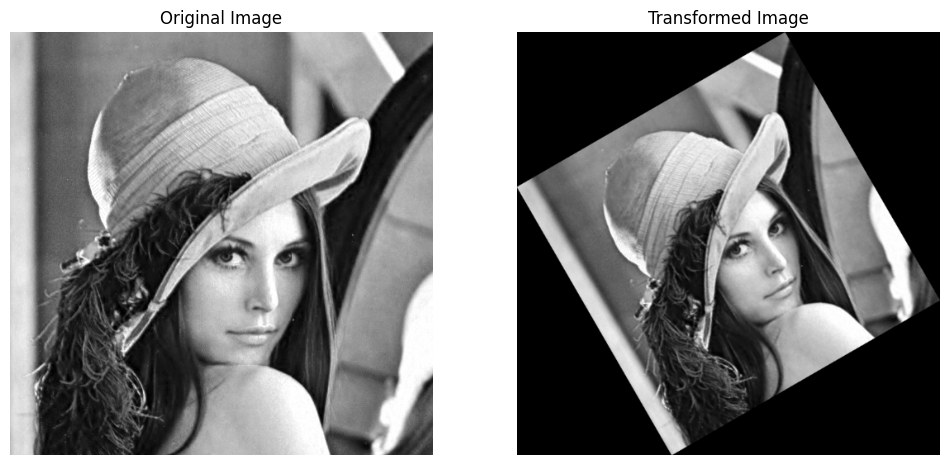

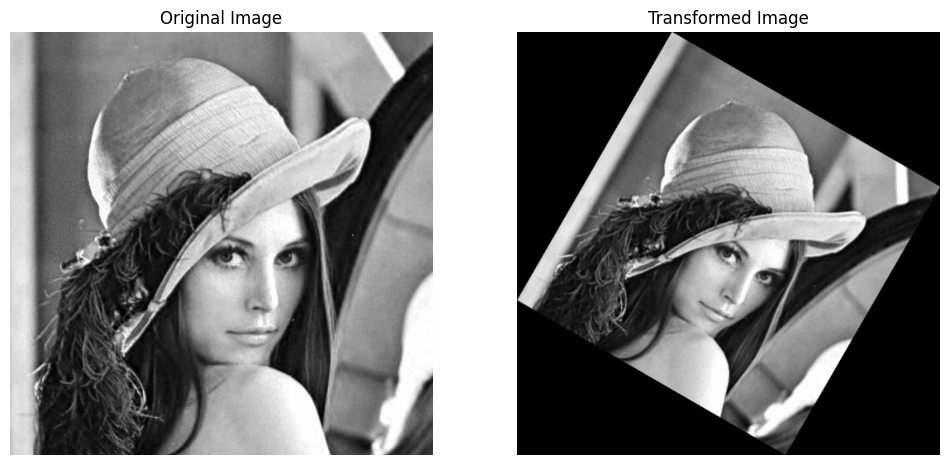

In [20]:
#-------------- Code Here ------------------#
def rotate_and_resize(image, angle, size=(512, 512)):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    cos = np.abs(rotation_matrix[0, 0])
    sin = np.abs(rotation_matrix[0, 1])
    new_width = int((height * sin) + (width * cos))
    new_height = int((height * cos) + (width * sin))

    rotation_matrix[0, 2] += (new_width / 2) - center[0]
    rotation_matrix[1, 2] += (new_height / 2) - center[1]
    rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))

    resized_image = cv2.resize(rotated_image, size)
    return resized_image

image = cv2.imread('Lenna_ori.bmp')

angle = 30
angle1 = -30

transformed_image = rotate_and_resize(image, angle)
transformed_image1 = rotate_and_resize(image, angle1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(cv2.cvtColor(transformed_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
#-------------- Stop Here ------------------#